**Importing Libraries**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**Importing File**


In [31]:
data=pd.read_excel("C:\\Users\\VISHWAS\\Downloads\\BlinkIT Grocery Data.xlsx")

In [32]:
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


**Shape**

In [40]:
data.shape

(8523, 12)

**Checking Null Values**

In [33]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [34]:
data['Item Weight']

0       15.10
1       11.80
2       13.85
3       12.15
4       19.60
        ...  
8518      NaN
8519      NaN
8520      NaN
8521      NaN
8522      NaN
Name: Item Weight, Length: 8523, dtype: float64

**Filling Null Values Using Median**

In [35]:
median_weight = data['Item Weight'].median()
data['Item Weight'].fillna(median_weight, inplace=True)

In [39]:
data.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

**Checking for duplicate Values**

In [36]:
data.duplicated

<bound method DataFrame.duplicated of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OU

**Clean the 'Item Fat Content' column**

In [37]:
data['Item Fat Content'] = data['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular'
})

In [38]:
data.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.6,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.6,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.6,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.6,97.8752,4.0
8522,Regular,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.6,112.2544,4.0


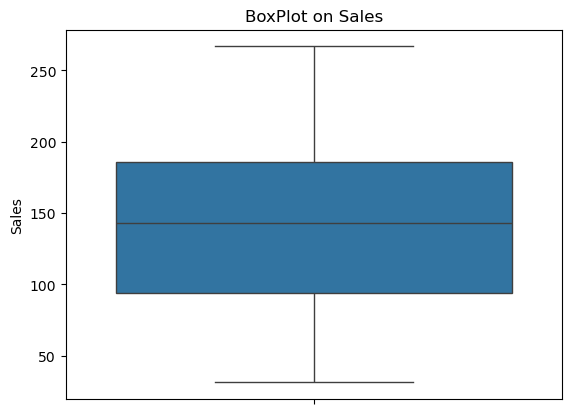

In [64]:
#Univarate
sns.boxplot(data['Sales'])
plt.title('BoxPlot on Sales')
plt.show()

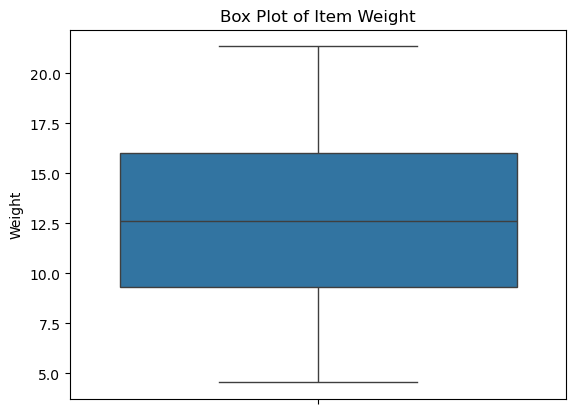

In [65]:
sns.boxplot(data['Item Weight'])
plt.title('Box Plot of Item Weight')
plt.ylabel('Weight')
plt.show()


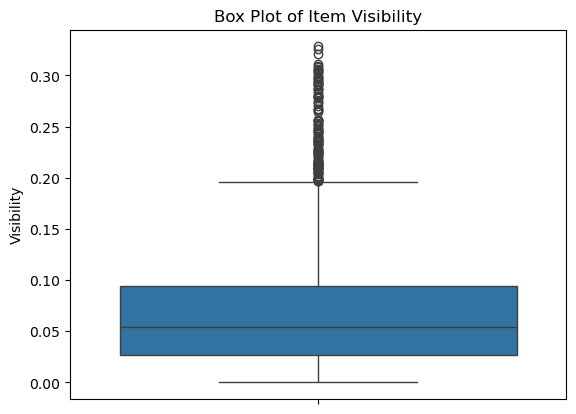

In [66]:
sns.boxplot(data['Item Visibility'])
plt.title('Box Plot of Item Visibility')
plt.ylabel('Visibility')
plt.show()

**Cleaning Outliers**

In [68]:
Q1 = data['Item Visibility'].quantile(0.25)

In [69]:
Q3 = data['Item Visibility'].quantile(0.75)

In [71]:
IQR= Q3-Q1
IQR

0.067595815

In [74]:
lower=Q1-1.5*IQR
higher=Q3+1.5*IQR
lower

-0.07440424500000001

In [77]:
data = data[(data['Item Visibility'] >= lower) & (data['Item Visibility'] <= higher)]
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.60,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.60,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.60,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.60,97.8752,4.0


**Cleaning Outliers Of Rating**

In [83]:
Q_1=data['Rating'].quantile(0.25)
Q_3=data['Rating'].quantile(0.75)
IQR_R=Q_3-Q_1
Lower_bound=Q_1-1.5*IQR_R
Upper_bound=Q_3-1.5*IQR_R
data=data[(data['Rating']>= Lower_bound) & (data['Rating']<=Upper_bound)]


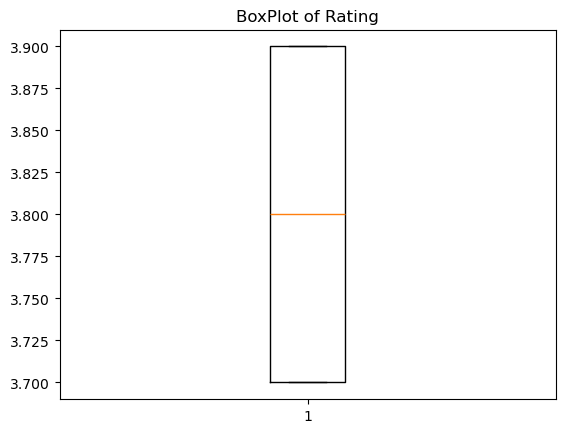

In [85]:
plt.boxplot(data['Rating'])
plt.title('BoxPlot of Rating')
plt.show()

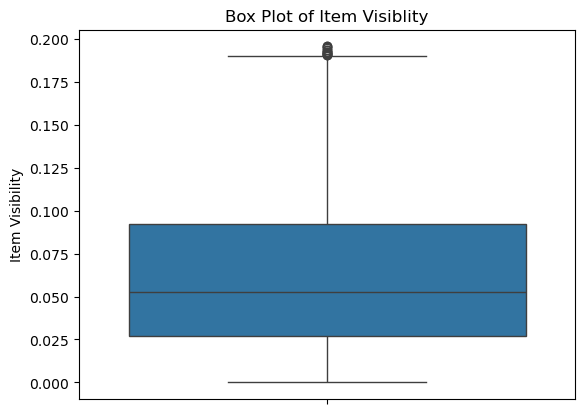

In [78]:
sns.boxplot(data['Item Visibility'])
plt.title('Box Plot of Item Visiblity')
plt.show()

**BIVARATE**

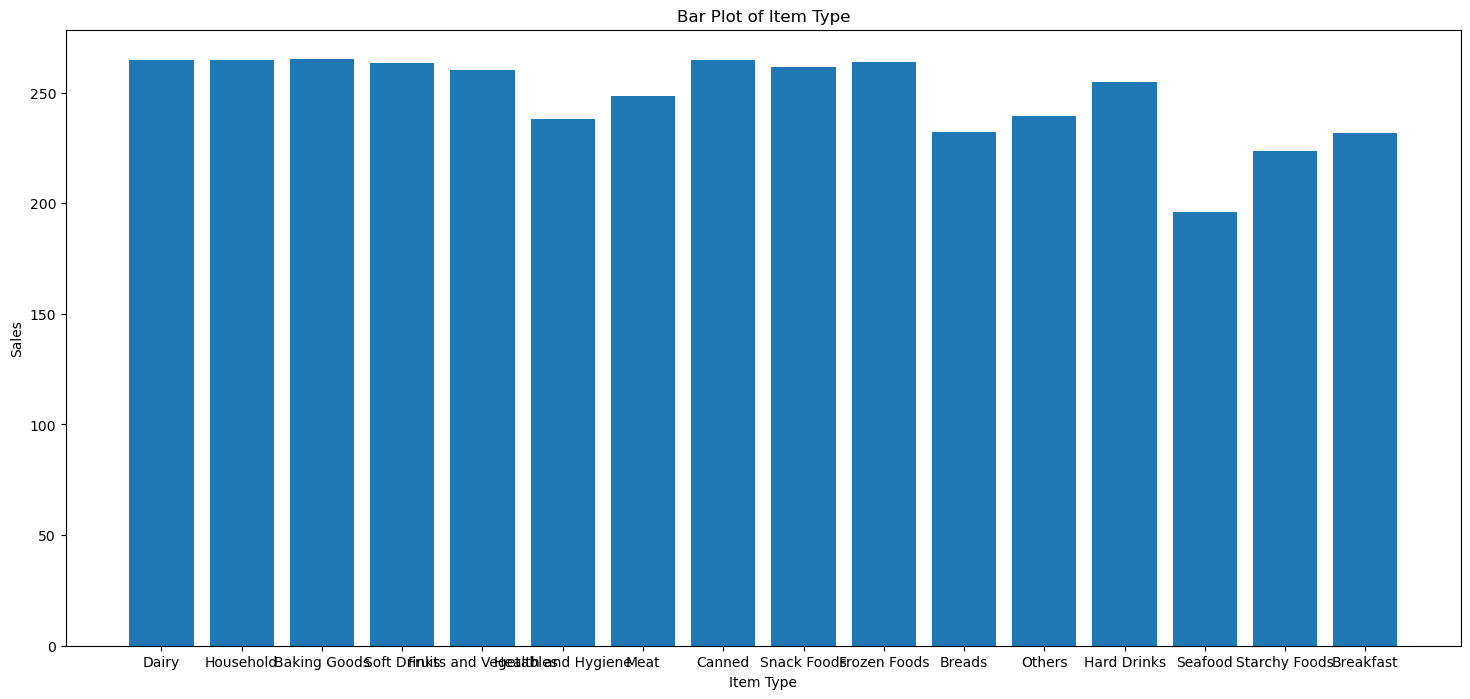

In [100]:
plt.figure(figsize=(18,8))
plt.bar(data['Item Type'],data['Sales'])
plt.title('Bar Plot of Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.show()


In [ ]:
plt.pie(data['Outlet Establishment Year'],data['Sales'])


In [104]:
data['Outlet Establishment Year'].

array([2017, 2018, 2016, 2011, 2015, 2022, 2020, 2012, 2014], dtype=int64)

In [114]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

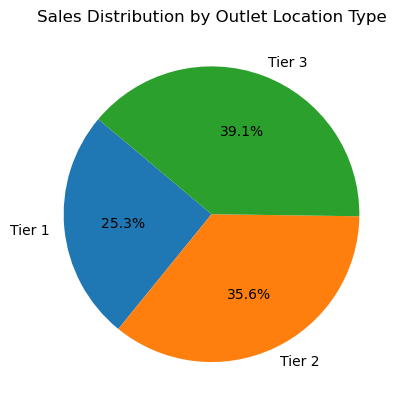

In [117]:
sales_per_location = data.groupby('Outlet Location Type')['Sales'].sum()
plt.pie(sales_per_location, labels=sales_per_location.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Outlet Location Type')
plt.show()


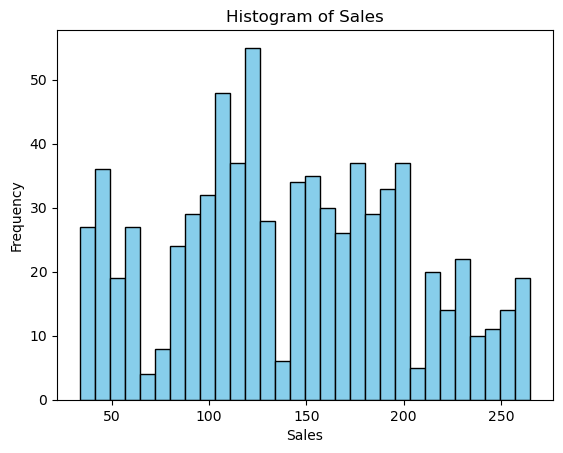

In [110]:
plt.hist(data['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

**MultiVarate**

In [122]:
numeric_data=data.select_dtypes(include='number')
corr=numeric_data.corr()
print(corr)

                           Outlet Establishment Year  Item Visibility  \
Outlet Establishment Year                   1.000000        -0.050929   
Item Visibility                            -0.050929         1.000000   
Item Weight                                -0.014634         0.004324   
Sales                                      -0.086438        -0.006870   
Rating                                      0.012966         0.060846   

                           Item Weight     Sales    Rating  
Outlet Establishment Year    -0.014634 -0.086438  0.012966  
Item Visibility               0.004324 -0.006870  0.060846  
Item Weight                   1.000000  0.037099 -0.016319  
Sales                         0.037099  1.000000 -0.010043  
Rating                       -0.016319 -0.010043  1.000000  


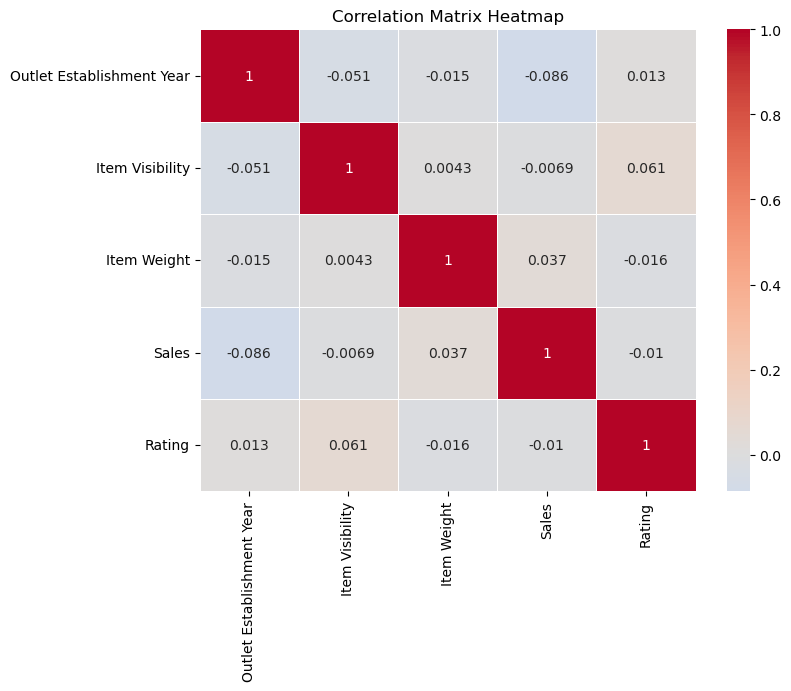

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

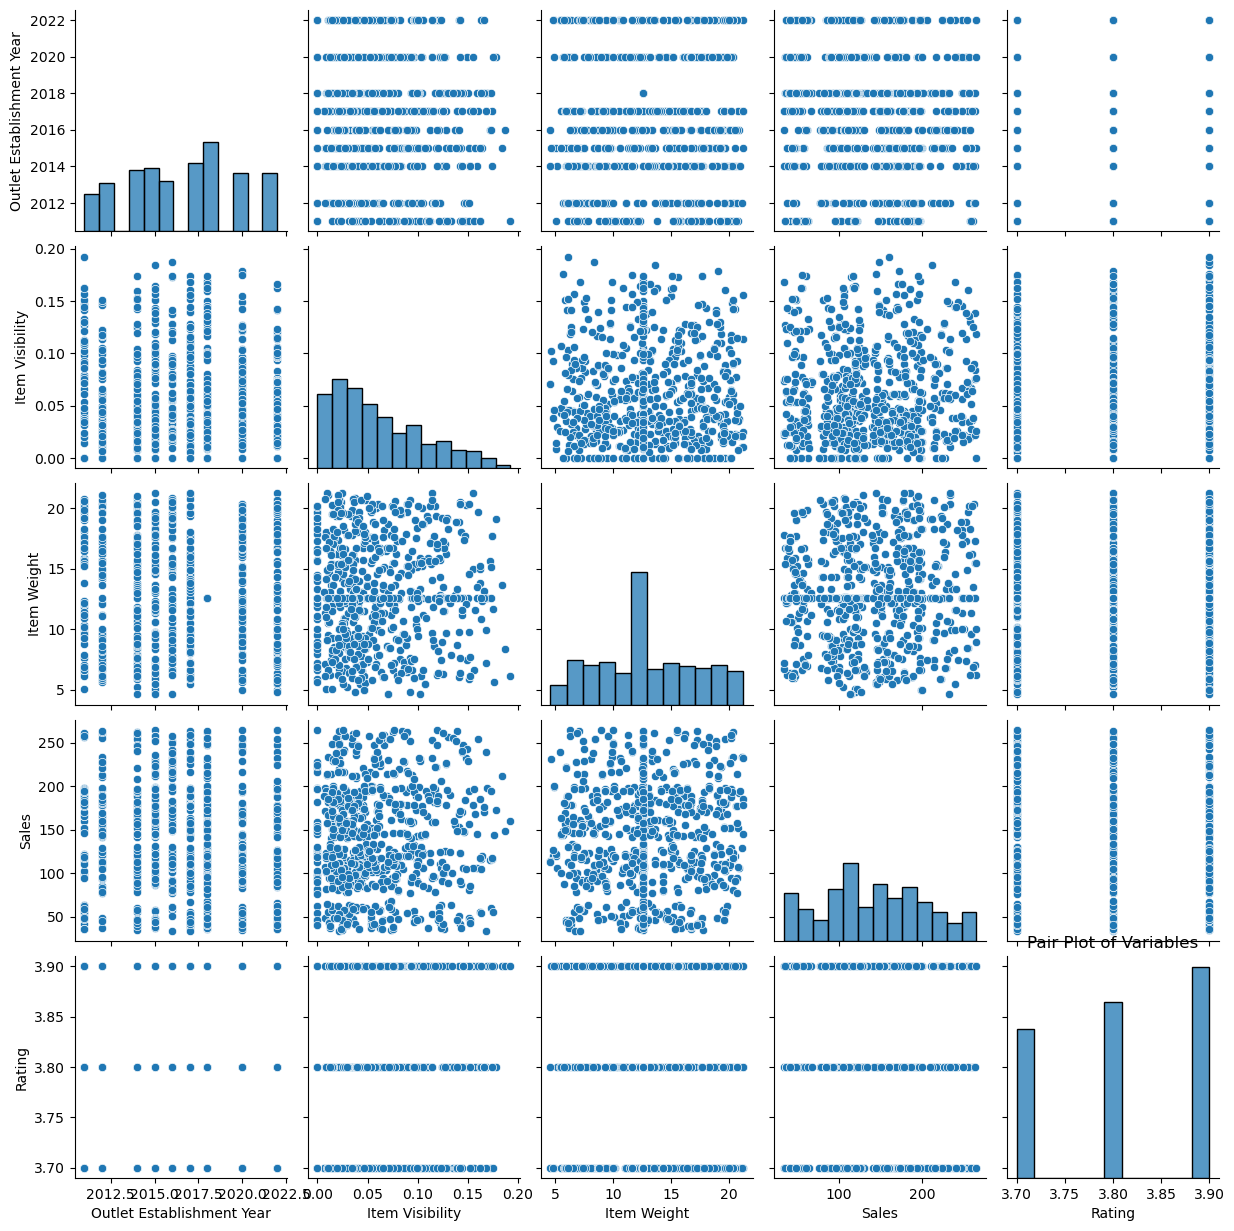

In [124]:
sns.pairplot(data[['Outlet Establishment Year', 'Item Visibility', 'Item Weight', 'Sales','Rating']].astype(float))
plt.title('Pair Plot of Variables')
plt.show()
